In [1]:
import cortex

In [2]:
# webview
# cortex.webshow(cortex.Volume.random("S1", "fullhead"))

In [ ]:
# left, right = cortex.db.S1.surfaces.inflated.get()
# cortex.db.S1.surfaces.flat.show()

Found 100.00% of EBA
Cutting 0 overlapping voxels (should be < ~50)


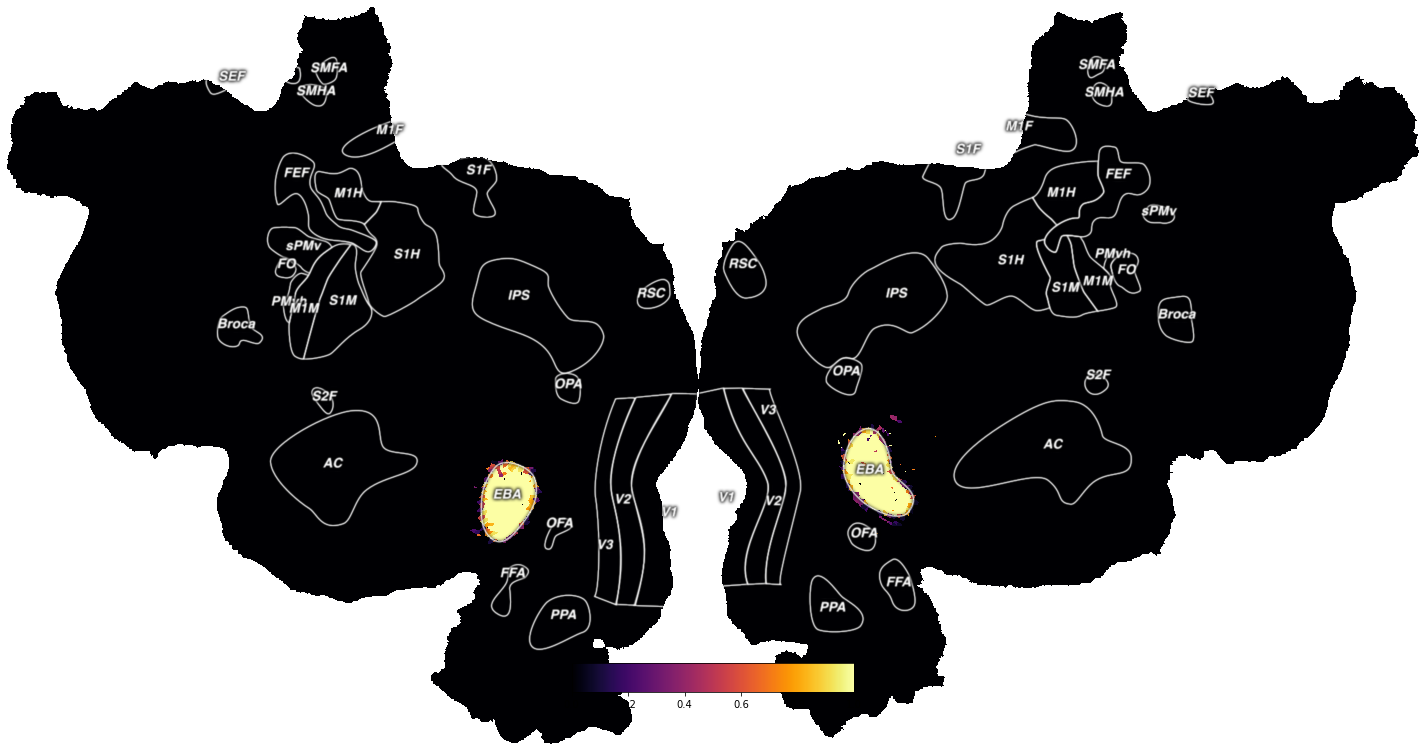

In [16]:
import cortex
import matplotlib.pyplot as plt

subject = "S1"
xfm = "fullhead"
roi = "EBA"

# Get the map of which voxels are inside of our ROI
roi_masks = cortex.utils.get_roi_masks(subject, xfm,
                                       roi_list=[roi],
                                       gm_sampler='cortical-conservative', # Select only voxels mostly within cortex
                                       split_lr=False, # No separate left/right ROIs
                                       threshold=None, # Leave roi mask values as probabilites / fractions
                                       return_dict=True
                                       )

# # Plot the mask for one ROI onto a flatmap
roi_data = cortex.Volume(roi_masks[roi], subject, xfm,
                         vmin=0, # This is a probability mask, so only
                         vmax=1, # so scale btw zero and one
                         cmap="inferno", # For pretty
                         )

cortex.quickflat.make_figure(roi_data,
                             thick=1, # select a single depth (btw white matter & pia)
                             sampler='nearest', # no interpolation
                             with_curvature=False,
                             with_colorbar=True,
                             )

plt.show()